In [97]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import scipy.cluster.hierarchy as shc 
from scipy.cluster.hierarchy import dendrogram, linkage

In [132]:
def load_iris_data():
    """
    Loads the iris data
    
    Returns:
    - pd.DataFrame: Iris dataset in DataFrame format.
    """
    iris = load_iris()
    return pd.DataFrame(iris.data, columns = iris.feature_names)

def preprocess_data(data):
    """
    Scales and normalizes the data using StandardScaler and Normalizer.
    
    Args:
    -   data : The dataset to preprocess.
    
    Returns:
    - pd.DataFrame: Scaled and normalized dataset.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns)

def plot_elbow_method(k_range, inertia_values):
    """
    Plots the Elbow method results.
    
    Args:
        k_range : Range of k values for clustering.
        inertia_values : Inertia values for each k.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='b')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of clusters(k)")
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid()
    plt.show()

def plot_silhouette_score(k_range, inertia_values):
    """
    Plots the Silhouette method results.
    
    Args:
        k_range : Range of k values for clustering.
        inertia_values : Inertia values for each k.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='b')
    plt.title("Silhouette score for Optimal K")
    plt.xlabel("Number of clusters(k)")
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid()
    plt.show()

def elbow_method(max_k, data):
    """
    Performs the Elbow method and visualizes the results.
    
    Args:
        max_k : Maximum number of clusters to try.
        data : The dataset to apply KMeans on.
    """
    k_values = range(1, max_k+1)
    inertia_values = [KMeans(n_clusters=k, random_state=42).fit(data).inertia_ for k in k_values]   
    plot_elbow_method(k_values, inertia_values)

def silhouette_scr(max_k, data, Clustering_Method):
    """
    Performs the Silhouette method and visualizes the results.
    
    Args:
        max_k : Maximum number of clusters to try.
        data : The dataset to apply clustering on.
        Clustering_Method: The Clustering method
    """
    k_values = range(2, max_k+1)
    silhouette_scores = [silhouette_score(data, Clustering_Method(n_clusters=k).fit_predict(data)) for k in k_values]
    plot_silhouette_score(k_values, silhouette_scores)


def kmeans_clustering(data, clusters, method='k-means++', init_num=10, iterations=300):
    """
    Performs KMeans clustering and returns the results.
    Args:
        data : The dataset to apply KMeans on.
        clusters : Number of clusters.
        method : Initialization method ('k-means++' or 'random').
        init_num : Number of initializations.
        iterations : Maximum number of iterations.
    
    Returns:
        tuple: Labels, centroids, and inertia of the clustering result.
    """
    kmeans = KMeans(
        n_clusters=clusters,
        init=method,
        n_init=init_num,
        max_iter=iterations,
        tol=1e-4,
        random_state=42
    )
    kmeans.fit(data)
    return  kmeans.labels_, kmeans.cluster_centers_, kmeans.inertia_

def visualize_kmeans_clustering_2d(data, labels, centroids, x_column_idx, y_column_idx):
    """
    Visualizes clustering results in a 2D plot.
    
    Args:
        data : The dataset with features used for clustering.
        labels : The cluster labels for each data point.
        centroids : Coordinates of cluster centers.
        title : Title for the plot.
        x_column_idx : Column index for x-axis.
        y_column_idx : Column index for y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, x_column_idx], data.iloc[:, y_column_idx], c=labels, cmap='plasma', s=50, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids' )
    plt.title(f"KMeans Clustering: Iris ({data.columns[x_column_idx]} vs {data.columns[y_column_idx]})")
    plt.xlabel(data.columns[x_column_idx])
    plt.ylabel(data.columns[y_column_idx])
    plt.legend()
    plt.grid()
    plt.show()

def agglomerative_clustering(data, n_clusters=None, metric='euclidean', linkage='ward', distance_threshold=0):
    """
    Performs Agglomerative Clustering
    
    Args:
        data : The dataset to apply AgglomerativeClustering on.
        n_clusters : Number of clusters. Defaults to None.
        metric : Distance metric. Defaults to 'euclidean'.
        linkage : Linkage method. Defaults to 'ward'.
        distance_threshold : Threshold for clustering. Defaults to 0.

        Returns:
        Labels: Labels of the clustering result.
    """
    agg_clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric=metric,
        linkage=linkage,
        distance_threshold=distance_threshold
    )
    labels = agg_clustering.fit_predict(data)
    return labels

def visualize_agglomerative_clustering(data, labels, x_column_idx, y_column_idx):
    """
    Visualizes clustering results in a 2D plot.
    
    Args:
        data (pd.DataFrame): The dataset with features used for clustering.
        labels (array): The cluster labels for each data point.
        x_column_idx (int): Column index for x-axis.
        y_column_idx (int): Column index for y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, x_column_idx], data.iloc[:, y_column_idx], c=labels, cmap='viridis', s=50, label='Data Points')
    plt.title("Agglomerative Clustering Results")
    plt.xlabel(data.columns[x_column_idx])
    plt.ylabel(data.columns[y_column_idx])
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_dendrogram(data, method):
    """
    Visualizes a dendogram.
    
    Args:
        data (pd.DataFrame): The dataset with features used for clustering.
        method:  linkage methods in hierarchical clustering
    """
    linkage_matrix = linkage(data, method=method)
    plt.figure(figsize=(10, 7))
    dendogram_plot = dendrogram(linkage_matrix, orientation='top', distance_sort='descending', no_labels=True)

def hdbscan_clustering(data, min_clusters=2, min_samples=4, metric='euclidean'):
    """
    Performs HDBSCAN clustering and returns the clustering labels.
    
    Args:
        data (pd.DataFrame): The dataset to apply HDBSCAN clustering on.
        min_clusters : Minimum size of clusters. Defaults to 2.
        min_samples : The number of samples in a neighborhood for a point to be considered a core point. Defaults to 4.
        metric : The distance metric to use for clustering. Defaults to 'euclidean'.

    Returns:
        Labels: Labels of the clustering result.
    """
    hdbscan_clustering = HDBSCAN(
        min_cluster_size = min_clusters,
        min_samples = min_samples,
        metric = metric,
        cluster_selection_method = 'eom',
        max_cluster_size = None
    )
    labels = hdbscan_clustering.fit_predict(data)
    return labels

def visualize_hdbscan_clustering(data, labels, x_column_idx, y_column_idx):
    """
    Visualizes HDBSCAN results in a 2D plot.
    
    Args:
        data (pd.DataFrame): The dataset with features used for clustering.
        labels (array): The cluster labels for each data point.
        x_column_idx (int): Column index for x-axis.
        y_column_idx (int): Column index for y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, x_column_idx], data.iloc[:, y_column_idx], c=labels, cmap='Set1', s=50, label='Data Points')
    plt.scatter(data.iloc[labels==-1,0], data.iloc[labels==-1,1], c='black', label='Noise')
    plt.title("HDBSCAN Clustering Results with Noise")
    plt.xlabel(data.columns[x_column_idx])
    plt.ylabel(data.columns[y_column_idx])
    plt.colorbar(label="Cluster Label")
    plt.legend()
    plt.grid()
    plt.show()

In [131]:
def main():
    df = load_iris_data()
    print(df.head(5))

    scaled_df = preprocess_data(df)
    
    silhouette_scr(10, scaled_df, KMeans)
    elbow_method(10, scaled_df)

    labels, centroids, inertia = kmeans_cluster(scaled_df, clusters=2, method='k-means++')
    visualize_kmeans_clustering_2d(scaled_df, labels, centroids, 2, 3)
    visualize_kmeans_clustering_2d(scaled_df, labels, centroids, 0, 1)

    agglomerative_labels=agglomerative_clustering(scaled_df)
    visualize_agglomerative_clustering(scaled_df, agglomerative_labels, 0, 1)
    visualize_agglomerative_clustering(scaled_df, agglomerative_labels, 2, 3)

    plot_dendrogram(scaled_df, 'ward')

    silhouette_scr(10, scaled_df, AgglomerativeClustering)

    agglomerative_labels=agglomerative_clustering(scaled_df, n_clusters=2, distance_threshold=None)
    visualize_agglomerative_clustering(scaled_df, agglomerative_labels, 0, 1)

    visualize_agglomerative_clustering(scaled_df, agglomerative_labels, 2, 3)

    hdbscan_labels = hdbscan_clustering(scaled_df)
    visualize_hdbscan_clustering(scaled_df, hdbscan_labels, 0, 1)
    visualize_hdbscan_clustering(scaled_df, hdbscan_labels, 2, 3)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


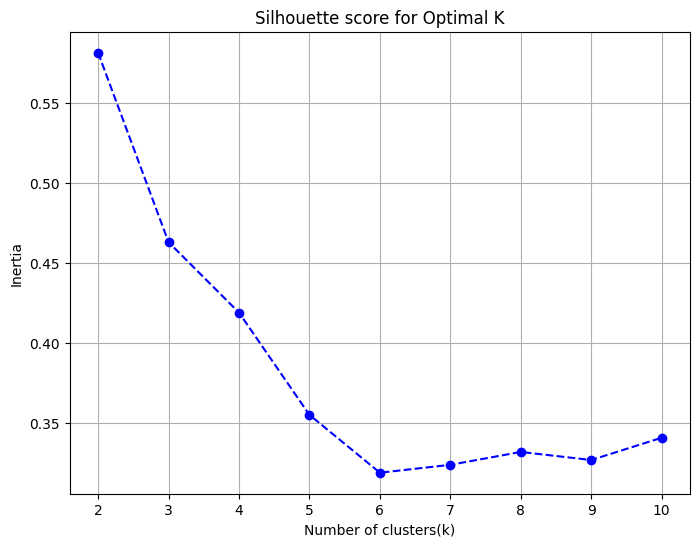

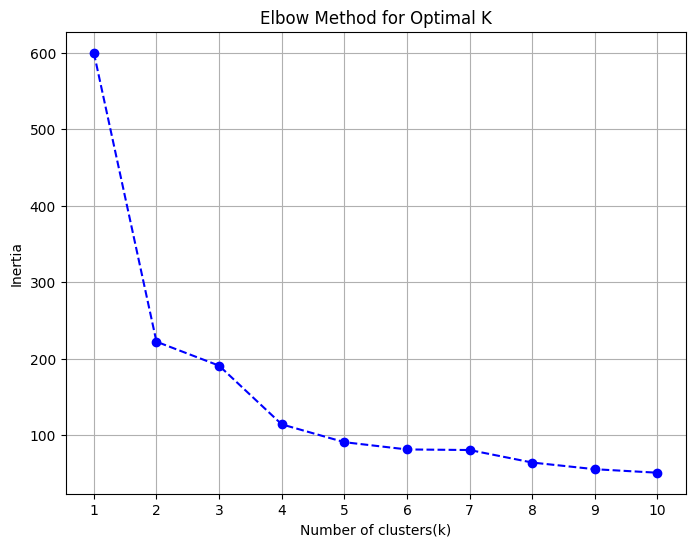

Cluster Centers:
 [[ 0.50728948 -0.42663134  0.65249366  0.62744675]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]] 
 Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] 
 Inertia:
 222.36170496502308 



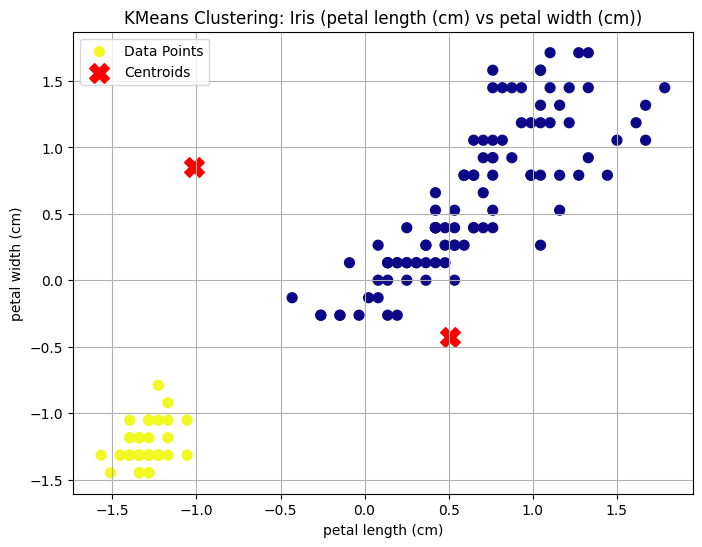

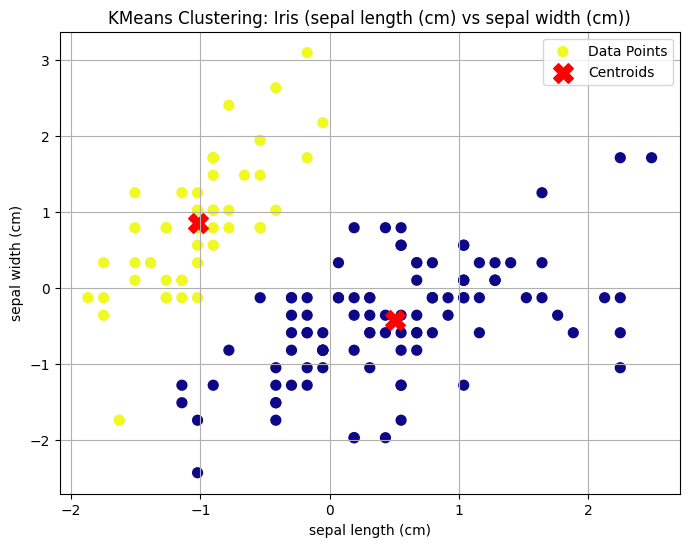

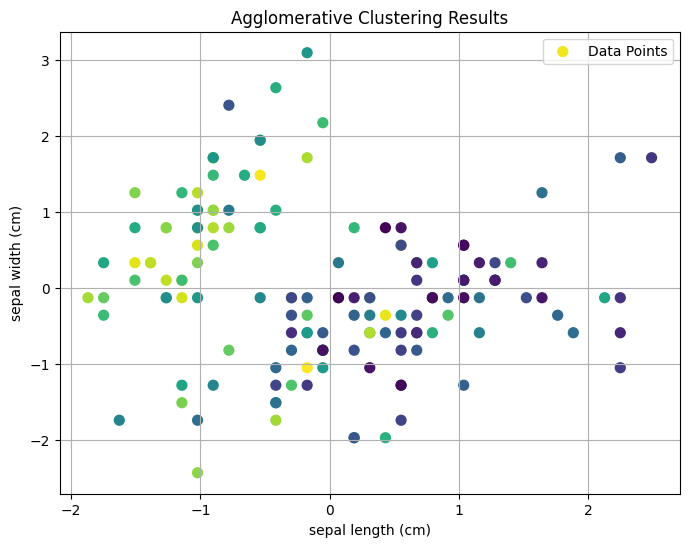

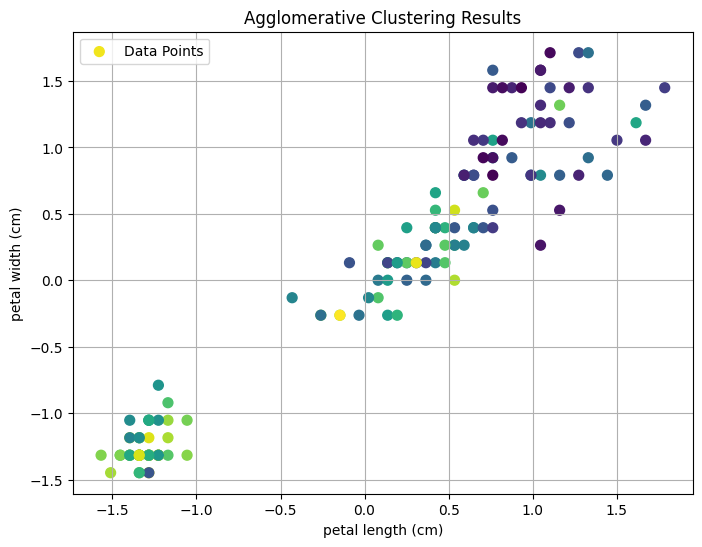

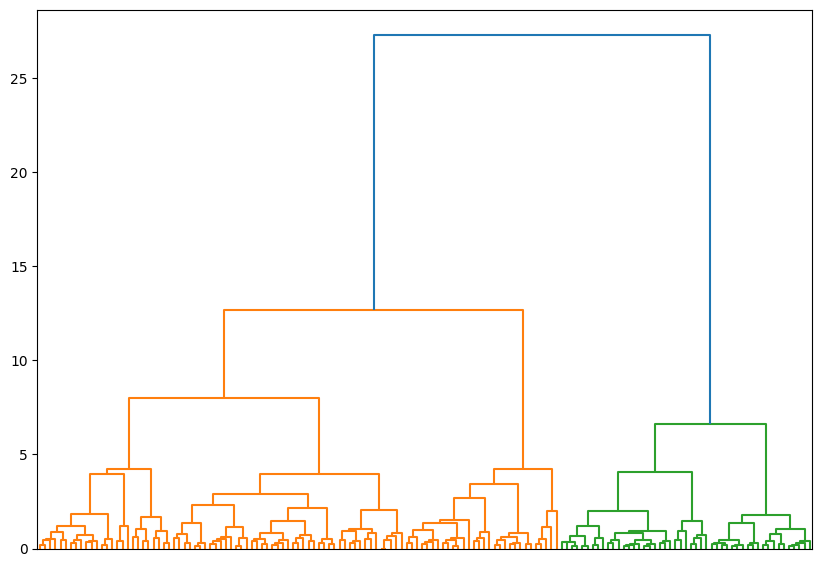

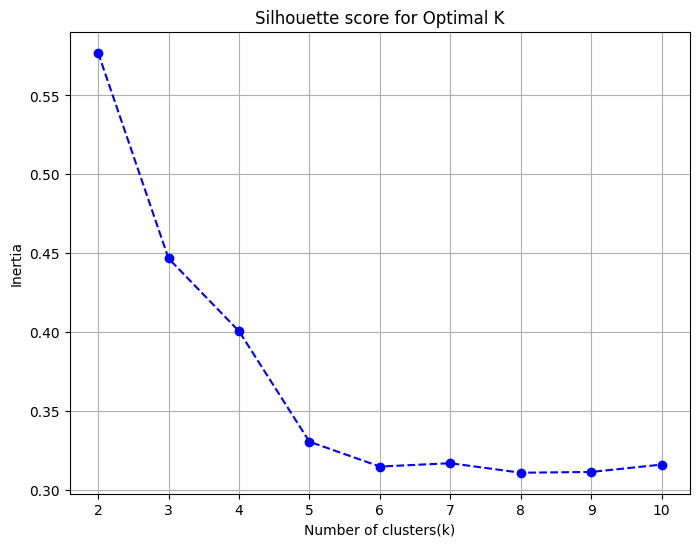

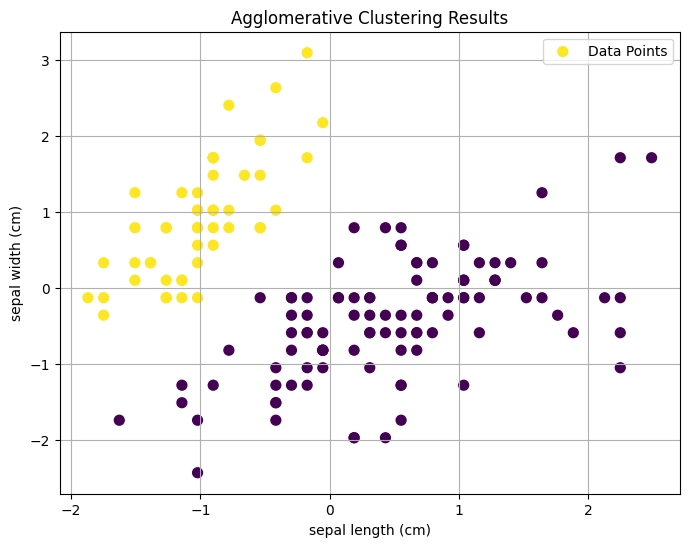

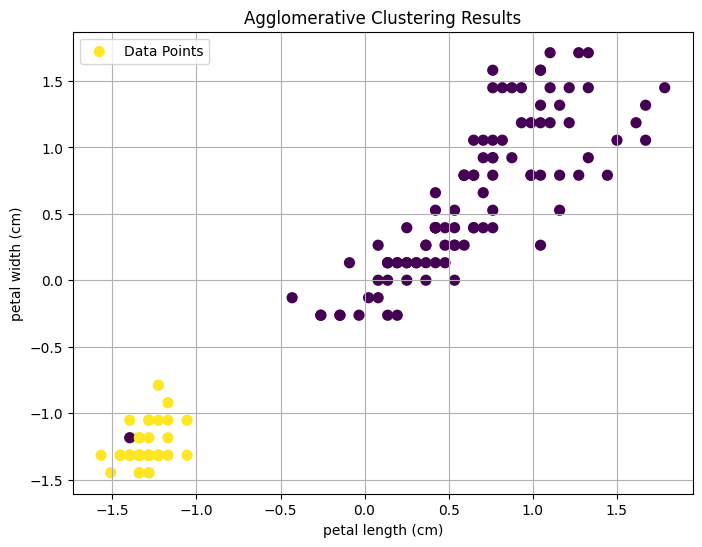

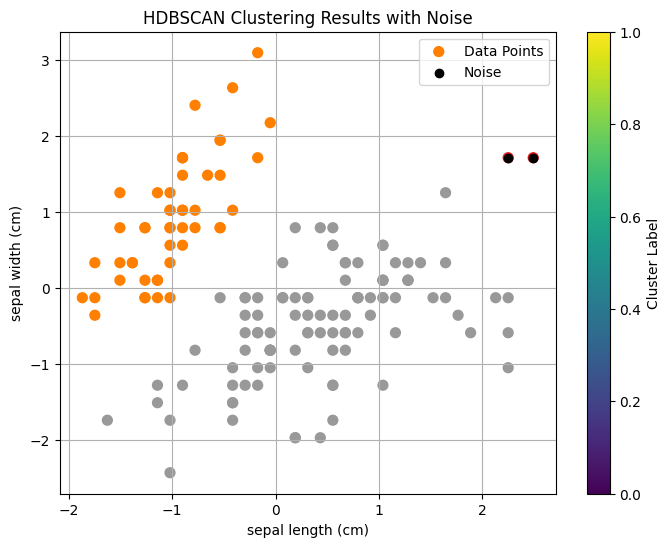

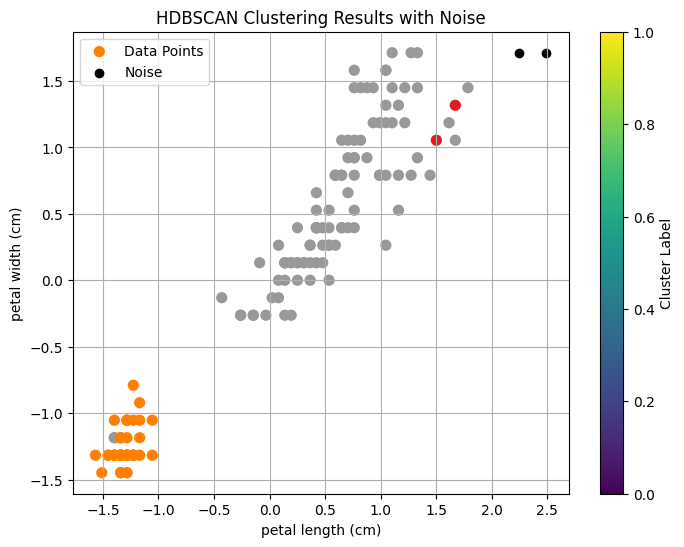

In [130]:
main()